In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import math
import random
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing
import scipy
import scipy.linalg as slin
import scipy.sparse.linalg as sparselin
import scipy.sparse as sparse

sns.set(color_codes=True)

import sys
sys.path.append("C:/Tang/influence-release-master")  #设置自定义包的搜索路径
from load_vehicles_adver_testset import load_vehicles_adver_testset
from influence.image_utils import plot_flat_colorimage, plot_flat_colorgrad

Using TensorFlow backend.


In [2]:
num_classes = 2
num_train_ex_per_class = 1000
num_test_ex_per_class = 300

model_name = 'carair_%s_%s' % (num_train_ex_per_class, num_test_ex_per_class)
image_data_sets = load_vehicles_adver_testset(
    num_train_ex_per_class=num_train_ex_per_class, 
    num_test_ex_per_class=num_test_ex_per_class)

X_train = image_data_sets.train.x
X_test = image_data_sets.test.x
Y_train = image_data_sets.train.labels * 2 - 1
Y_test = image_data_sets.test.labels * 2 - 1
del image_data_sets

Loading vehicles from disk...


The test index now is 100. 
Test image:
1.0 2.0393827 0.433879017829895


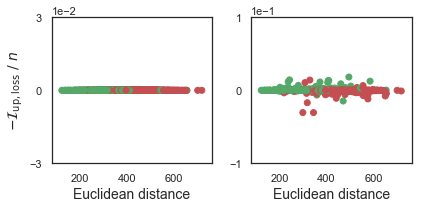

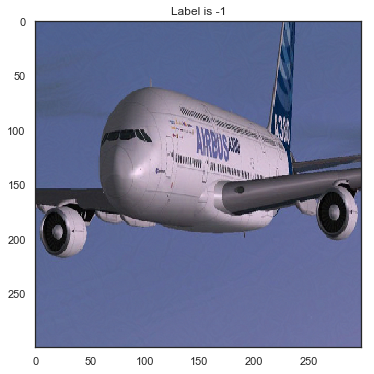

Top from Inception:
1992 1.0 409.37225 0.013249538421630859
167 1.0 407.40326 0.013499804496765137
1279 -1.0 329.08044 0.01412842845916748
902 1.0 242.7119 0.01433449649810791
1167 1.0 494.7686 0.018292495727539063


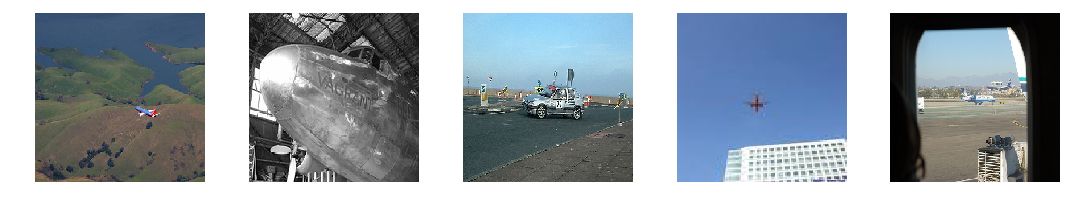

Last from Inception:
578 -1.0 344.54718 -0.030489938735961914
591 -1.0 299.25443 -0.03046537971496582
1076 -1.0 317.99918 -0.016944067001342773
500 1.0 470.4604 -0.014640209197998046
1907 -1.0 575.5899 -0.011780523300170898


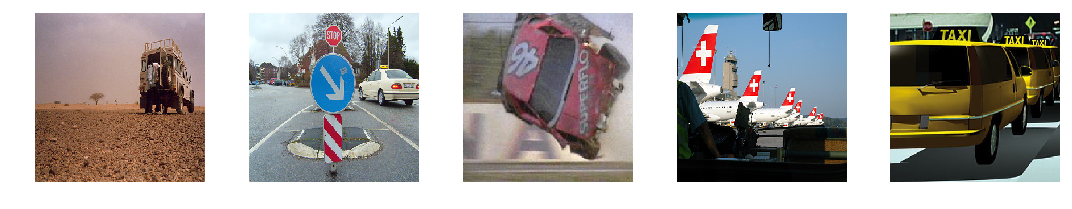

In [3]:
# a = random.sample(range(0,600), 50)
# count1=128
# count2=226
# count = 0
for i in [100]:
    f = np.load('output11/adver_testset_carair_results_%s.npz' % i)
    test_idx = f['test_idx']
    inception_Y_pred_correct = f['inception_Y_pred_correct']
    
    if inception_Y_pred_correct[test_idx] < 0.5:
        #count += 1
        distances = f['distances']
        flipped_idx = f['flipped_idx']
        rbf_margins_test = f['rbf_margins_test']
        rbf_margins_train = f['rbf_margins_train']        
        rbf_predicted_loss_diffs = f['rbf_predicted_loss_diffs']
        inception_predicted_loss_diffs = f['inception_predicted_loss_diffs']

        print('The test index now is %s. ' % i)
        sns.set_style('white')
        fontsize=14

        fig, axs = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(6, 3))

        num_train = len(flipped_idx)
        color_vec = np.array(['g'] * num_train)
        color_vec[flipped_idx] = 'r'
        color_vec = list(color_vec)

        axs[0].scatter(distances, rbf_predicted_loss_diffs, color=color_vec)
        axs[0].set_ylim(-0.03, 0.03)
        axs[0].set_yticks((-0.03, 0, 0.03))
        axs[0].ticklabel_format(style='sci', scilimits=(0,0), axis='y')
        axs[0].set_xlabel('Euclidean distance', fontsize=fontsize)
        axs[0].set_ylabel('$-\mathcal{I}_\mathrm{up, loss} \ /\ n$', fontsize=fontsize)

        axs[1].scatter(distances, inception_predicted_loss_diffs, color=color_vec)
        axs[1].set_ylim(-0.1, 0.1)
        axs[1].set_yticks((-0.1, 0, 0.1))
        axs[1].ticklabel_format(style='sci', scilimits=(0,0), axis='y')
        axs[1].set_xlabel('Euclidean distance', fontsize=fontsize)

        plt.tight_layout()

        print('Test image:')
        print(Y_test[test_idx], rbf_margins_test[test_idx], inception_Y_pred_correct[test_idx])
        plot_flat_colorimage((X_test[test_idx, :] + 1) / 2, 0, side=299)

#         print('Top from RBF:')
#         fig, axs = plt.subplots(1, 5, figsize=(15,3))
#         for counter, train_idx in enumerate(np.argsort(rbf_predicted_loss_diffs)[-5:]):
#             print(train_idx, Y_train[train_idx], distances[train_idx], rbf_margins_train[train_idx], rbf_predicted_loss_diffs[train_idx])
#             x_train = X_train[train_idx, :]
#             axs[counter].imshow((np.reshape(x_train, [299, 299, 3]) + 1) / 2, interpolation='none')  
#             axs[counter].axis('off')
#         plt.tight_layout()
#         plt.show()

        print('Top from Inception:')
        fig, axs = plt.subplots(1, 5, figsize=(15,3))
        for counter, train_idx in enumerate(np.argsort(inception_predicted_loss_diffs)[-5:]):
            print(train_idx, Y_train[train_idx], distances[train_idx], inception_predicted_loss_diffs[train_idx])    
            x_train = X_train[train_idx, :]
            axs[counter].imshow((np.reshape(x_train, [299, 299, 3]) + 1) / 2, interpolation='none')  
            axs[counter].axis('off')
        plt.tight_layout()
        plt.show()
        
        print('Last from Inception:')
        fig, axs = plt.subplots(1, 5, figsize=(15,3))
        for counter, train_idx in enumerate(np.argsort(inception_predicted_loss_diffs)[:5]):
            print(train_idx, Y_train[train_idx], distances[train_idx], inception_predicted_loss_diffs[train_idx])    
            x_train = X_train[train_idx, :]
            axs[counter].imshow((np.reshape(x_train, [299, 299, 3]) + 1) / 2, interpolation='none')  
            axs[counter].axis('off')
        plt.tight_layout()
        plt.show()
        
#print('count=', count)

In [22]:
from scipy import stats

In [35]:
fault_index=[]
for i in range(600):
    f = np.load('output11/adver_testset_carair_results_%s.npz' % i)
    test_idx = f['test_idx']
    inception_Y_pred_correct = f['inception_Y_pred_correct']
    
    if inception_Y_pred_correct[test_idx] < 0.5:
        fault_index.append(i)

Test image:
136 1.0 0.11526630073785782


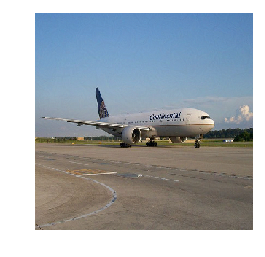

Influence value box plot:
DescribeResult(nobs=2000, minmax=(-0.07182769775390625, 0.04654027557373047), mean=-2.2002557292573332e-08, variance=1.4262452332241226e-05, skewness=-5.559790754662443, kurtosis=163.97130052438845) median=9.126224741339684e-05
Test image:
16 1.0 0.0003946998040191829


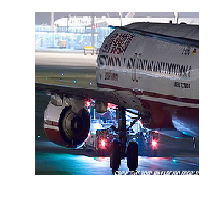

Influence value box plot:
DescribeResult(nobs=2000, minmax=(-0.08263166046142578, 0.038006320953369144), mean=8.016312494779631e-10, variance=2.3320395371087446e-05, skewness=-9.342920330048793, kurtosis=153.91815762192144) median=0.0005006834268569947
Test image:
402 1.0 0.11251392960548401


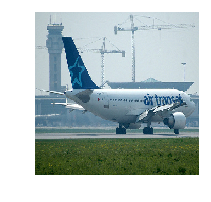

Influence value box plot:
DescribeResult(nobs=2000, minmax=(-0.07184379577636718, 0.04590158081054688), mean=-1.1295957025127257e-08, variance=1.1266555860849784e-05, skewness=-4.840120694243558, kurtosis=177.66326889489665) median=0.00010802046954631805


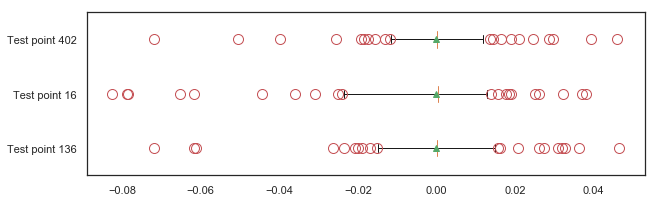

In [95]:
influence_important=[]
#for i in random.sample(fault_index, 3):
for i in [136, 16, 402]:
    f = np.load('output11/adver_testset_carair_results_%s.npz' % i)
    test_idx = f['test_idx']
    inception_Y_pred_correct = f['inception_Y_pred_correct']
    inception_predicted_loss_diffs = f['inception_predicted_loss_diffs']
    
    print('Test image:')
    print(test_idx, Y_test[test_idx], inception_Y_pred_correct[test_idx])
    plt.axis('off')
    plt.imshow((np.reshape(X_test[test_idx, :], [299, 299, 3]) + 1) / 2, interpolation='none', )
    #plt.savefig('finish/adver_%s.jpg' % i, dpi=300, bbox_inches='tight')
    plt.show()
    
    influence_important.append(inception_predicted_loss_diffs)
    #influence_important = inception_predicted_loss_diffs[np.abs(inception_predicted_loss_diffs)>0.002]
    print(stats.describe(inception_predicted_loss_diffs), 'median=%s' % np.median(inception_predicted_loss_diffs))

print('Influence value box plot:')
plt.figure(figsize=(10,3))
labels=['Test point 136', 'Test point 16', 'Test point 402']
flierprops = dict(marker='o',  markersize=10,
                  linestyle='none', markeredgecolor='r')
plt.boxplot(influence_important,
            labels=labels,
            vert=False,
            whis=[0.5, 99.5],
            #notch=True,
            showmeans=True,
            showbox=False,
            flierprops=flierprops)
plt.savefig('finish/adver_boxplot.jpg', dpi=300, bbox_inches='tight')

Test image:
136 1.0 0.11526630073785782
Influence value plot:


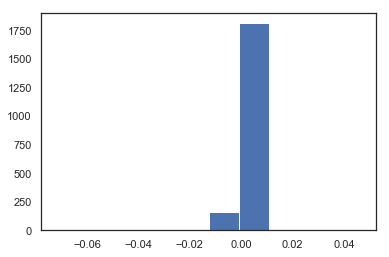

C:\ProgramData\Anaconda3\envs\dl\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


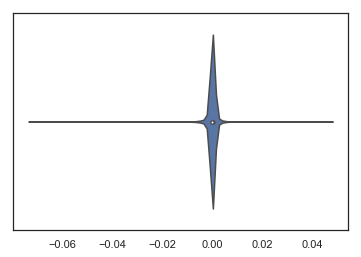

DescribeResult(nobs=2000, minmax=(-0.07182769775390625, 0.04654027557373047), mean=-2.2002557292573332e-08, variance=1.4262452332241226e-05, skewness=-5.559790754662443, kurtosis=163.97130052438845) median=9.126224741339684e-05
Test image:
16 1.0 0.0003946998040191829
Influence value plot:


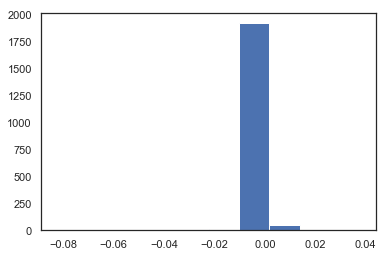

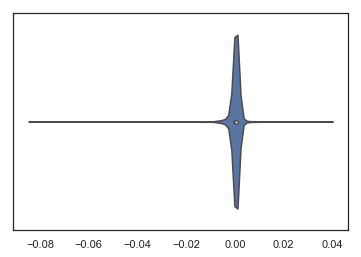

DescribeResult(nobs=2000, minmax=(-0.08263166046142578, 0.038006320953369144), mean=8.016312494779631e-10, variance=2.3320395371087446e-05, skewness=-9.342920330048793, kurtosis=153.91815762192144) median=0.0005006834268569947
Test image:
402 1.0 0.11251392960548401
Influence value plot:


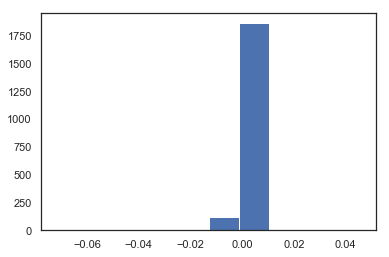

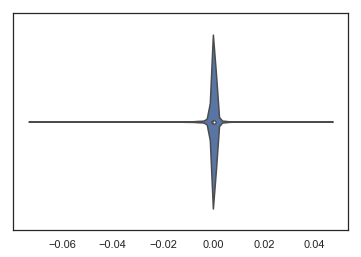

DescribeResult(nobs=2000, minmax=(-0.07184379577636718, 0.04590158081054688), mean=-1.1295957025127257e-08, variance=1.1266555860849784e-05, skewness=-4.840120694243558, kurtosis=177.66326889489665) median=0.00010802046954631805


In [94]:
for i in [136, 16, 402]:
    f = np.load('output11/adver_testset_carair_results_%s.npz' % i)
    test_idx = f['test_idx']
    inception_Y_pred_correct = f['inception_Y_pred_correct']
    inception_predicted_loss_diffs = f['inception_predicted_loss_diffs']
    
    print('Test image:')
    print(test_idx, Y_test[test_idx], inception_Y_pred_correct[test_idx])
    
    print('Influence value plot:')
    plt.hist(inception_predicted_loss_diffs)
    plt.show()
    sns.violinplot(inception_predicted_loss_diffs, shade=True)
    plt.show()
    print(stats.describe(inception_predicted_loss_diffs), 'median=%s' % np.median(inception_predicted_loss_diffs))

In [6]:
X_adv = np.load('C:/Tang/data/car_airplane/dataset_car-airplane_adversarial_testset.npz')['X_test_adver']
Y_test = np.load('C:/Tang/data/car_airplane/dataset_car-airplane_adversarial_testset.npz')['Y_test']

In [ ]:
fig, axs = plt.subplots(20, 4, figsize=(12, 60))
for idx in range(80):
    x = adv[idx]
    axs[idx//4, idx%4].imshow((x + 1) / 2, interpolation='none')
    axs[idx//4, idx%4].set_xlabel('index = %s \n label = %s' % (idx, Y_test[idx]), fontsize=14)
plt.tight_layout()

In [20]:
count = 0
for i in X_adv:
    if (i == 0.).all():
        count+=1
print(count)

444


In [23]:
a = np.load('C:/Tang/data/car_airplane/dataset_car-airplane_adversarial_testset_0-275.npz')['X_test_adver']
b = np.load('C:/Tang/data/car_airplane/dataset_car-airplane_adversarial_testset_276-443.npz')['X_test_adver']
c = np.load('C:/Tang/data/car_airplane/dataset_car-airplane_adversarial_testset_444-600.npz')['X_test_adver']

In [25]:
d = np.zeros((600, 299, 299, 3))

In [26]:
for i in range(0, 276):
    d[i] = a[i]
for j in range(276, 444):
    d[j] = b[j]
for k in range(444, 600):
    d[k] = c[k]

In [28]:
f = np.load('C:/Tang/data/car_airplane/dataset_car-airplane_adversarial_testset.npz')

In [29]:
np.savez('C:/Tang/data/car_airplane/dataset_car-airplane_adversarial_testset.npz', 
         X_test_adver = d, 
         Y_test = f['Y_test'])

In [30]:
x = np.load('C:/Tang/data/car_airplane/dataset_car-airplane_adversarial_testset.npz')['X_test_adver']

In [31]:
count = 0
for i in x:
    if (i == 0.).all():
        count+=1
print(count)

0


In [11]:
# 看看影响值的和有没有问题
f = np.load('output11/adver_testset_carair_results_%s.npz' % 57)
test_idx = f['test_idx']
inception_Y_pred_correct = f['inception_Y_pred_correct']   
rbf_predicted_loss_diffs = f['rbf_predicted_loss_diffs']
inception_predicted_loss_diffs = f['inception_predicted_loss_diffs']
sum_rbf = 0.
sum_inception = 0.
for i in range(2000):
    sum_rbf += rbf_predicted_loss_diffs[i]
    sum_inception += inception_predicted_loss_diffs[i]
print(sum_rbf, sum_inception)

0.0 1.19080692531593e-05
